# Causal graph - domain knowledge inference
From the below graphs :  
Country, Managed By  
Managed By, Fulfill Via  
Managed By, Shipment Mode  
Country, Shipment Mode  
Country, Product Group  
Brand, Product Group  
Product Group, Sub Classification  

In [4]:
import pandas as pd
import seaborn as sns
import networkx as nx

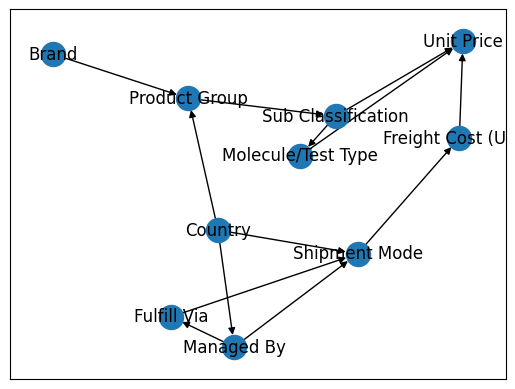

In [37]:
causal_graph = nx.DiGraph(
    [
        ("Country", "Managed By"),
        ("Managed By", "Fulfill Via"),
        ("Managed By", "Shipment Mode"),
        ("Fulfill Via", "Shipment Mode"),
        ("Country", "Shipment Mode"),
        ("Country", "Product Group"),
        ("Brand", "Product Group"),
        ("Product Group", "Sub Classification"),
        ("Sub Classification", "Molecule/Test Type"),
        # Price
        ("Shipment Mode", "Freight Cost (USD)"),
        ("Freight Cost (USD)", "Unit Price"),
        ("Sub Classification", "Unit Price"),
        ("Molecule/Test Type", "Unit Price"),
    ]
)
nx.draw_networkx(causal_graph)

In [2]:
path = "../data/SCMS_Delivery_History_Dataset.csv"
dataset = pd.read_csv(path)
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [16]:
dataset.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [14]:
dataset[["Freight Cost (USD)"]]

,Freight Cost (USD)
0,780.34
1,4521.5
2,1653.78
3,16007.06
4,45450.08
...,...
10319,See DN-4307 (ID#:83920)
10320,See DN-4313 (ID#:83921)
10321,Freight Included in Commodity Cost
10322,Freight Included in Commodity Cost


In [18]:
cols_to_keep = [
    "Country",
    "Managed By",
    "Fulfill Via",
    "Shipment Mode",
    "Product Group",
    "Sub Classification",
    "Molecule/Test Type",
    "Brand",
    "Freight Cost (USD)",
    "Unit Price",
]
dataset_unit_price = dataset[cols_to_keep]
cols_to_convert = ["Freight Cost (USD)", "Unit Price"]
dataset_unit_price.loc[:, cols_to_convert] = dataset_unit_price[cols_to_convert].apply(pd.to_numeric, errors="coerce")

dataset_unit_price.head()

,Country,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,Molecule/Test Type,Brand,Freight Cost (USD),Unit Price
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,HRDT,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,780.34,0.97
1,Vietnam,PMO - US,Direct Drop,Air,ARV,Pediatric,Nevirapine,Generic,4521.5,0.03
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,HRDT,HIV test,"HIV 1/2, Determine Complete HIV Kit",Determine,1653.78,0.80
3,Vietnam,PMO - US,Direct Drop,Air,ARV,Adult,Lamivudine,Generic,16007.06,0.07
4,Vietnam,PMO - US,Direct Drop,Air,ARV,Adult,Stavudine,Generic,45450.08,0.05


## Country -> Managed By -> Fulfill Via ; Shipment Mode

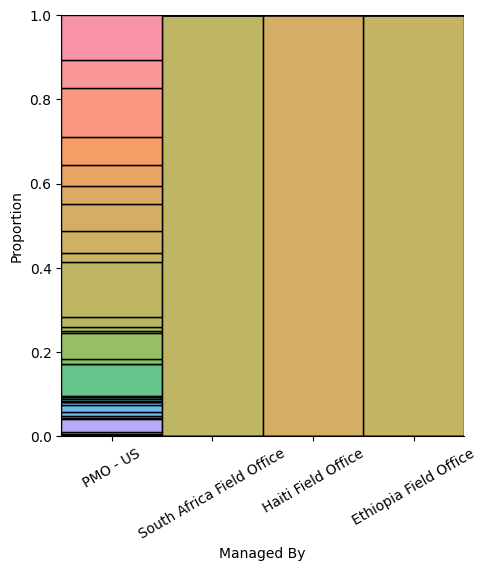

In [21]:
g = sns.displot(dataset_unit_price, x="Managed By", hue="Country", multiple="fill", stat="proportion", legend=False, kind="hist")
g.set_xticklabels(rotation=30)

<Axes: xlabel='Shipment Mode', ylabel='Proportion'>

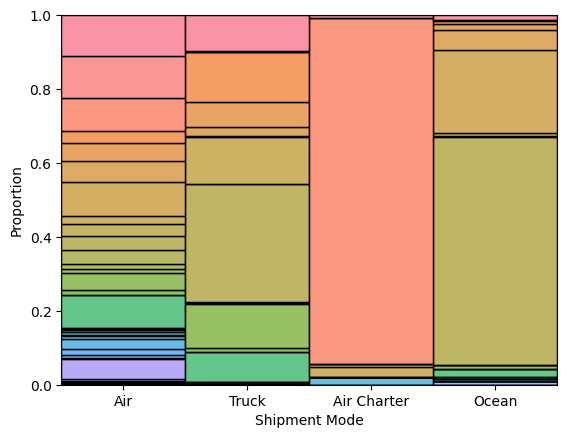

In [6]:
sns.histplot(dataset, x="Shipment Mode", hue="Country", multiple="fill", stat="proportion", legend=False)

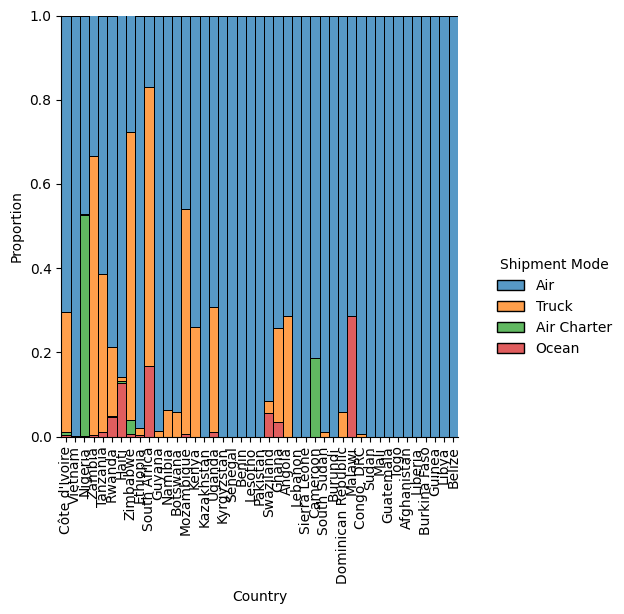

In [7]:
g = sns.displot(dataset_unit_price, x="Country", hue="Shipment Mode", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=90)

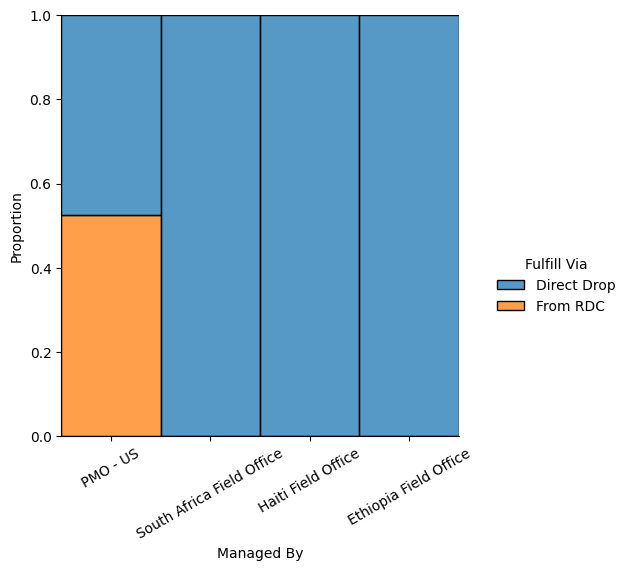

In [8]:
g = sns.displot(dataset_unit_price, x="Managed By", hue="Fulfill Via", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=30)

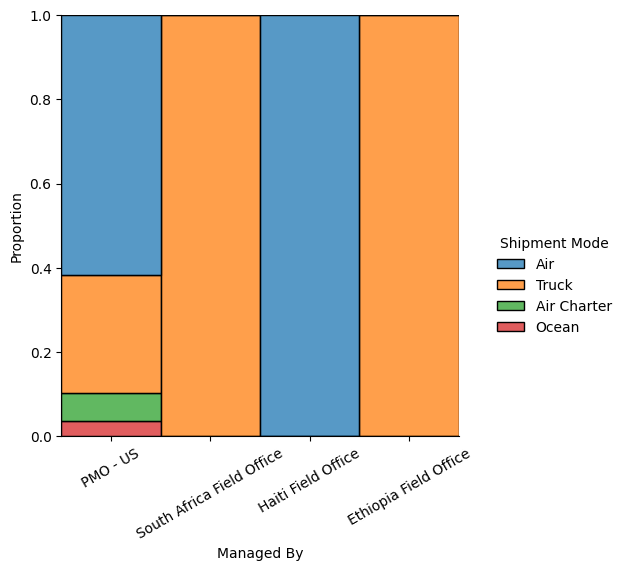

In [9]:
g = sns.displot(dataset_unit_price, x="Managed By", hue="Shipment Mode", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=30)

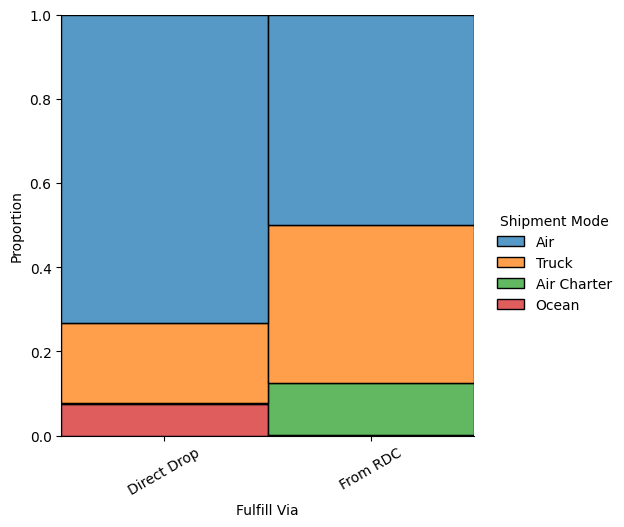

In [10]:
g = sns.displot(dataset_unit_price, x="Fulfill Via", hue="Shipment Mode", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=30)

## Country -> Product Group -> Sub Classification + Brand

<Axes: xlabel='Product Group', ylabel='Proportion'>

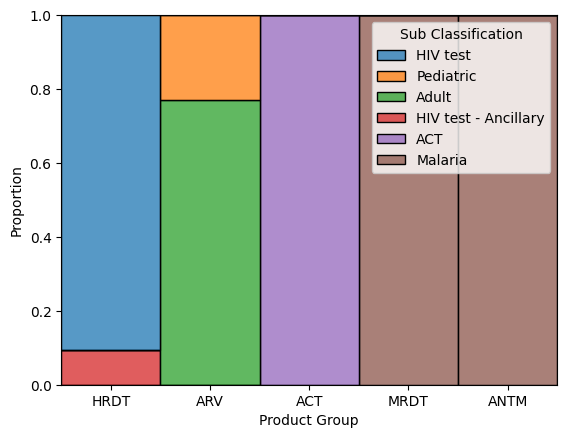

In [11]:
sns.histplot(dataset, x="Product Group", hue="Sub Classification", multiple="fill", stat="proportion")

<Axes: xlabel='Sub Classification', ylabel='Proportion'>

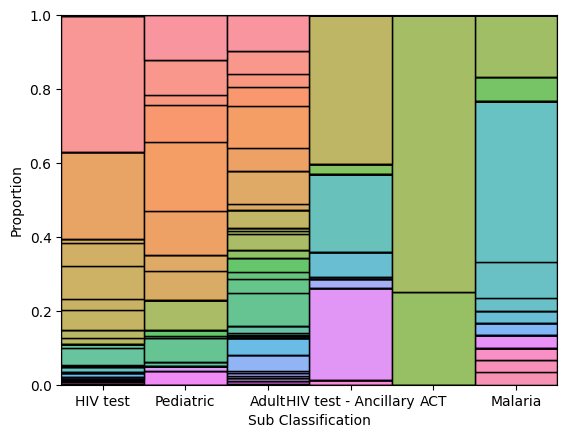

In [12]:
sns.histplot(dataset, x="Sub Classification", hue="Molecule/Test Type", multiple="fill", stat="proportion", legend=False)

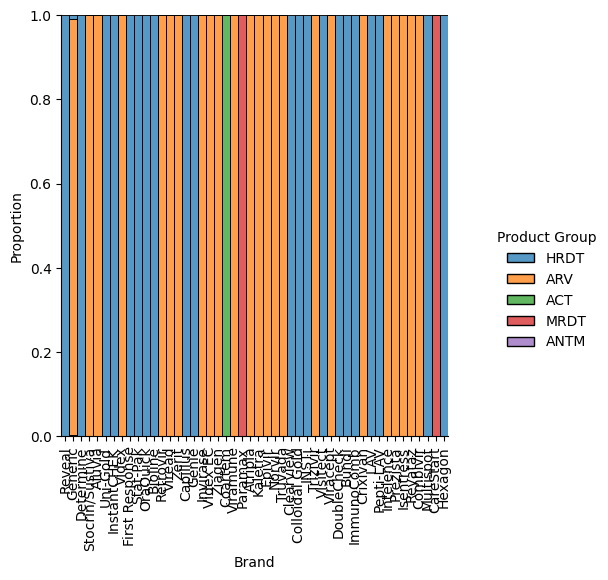

In [13]:
g = sns.displot(dataset, x="Brand", hue="Product Group", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=90)

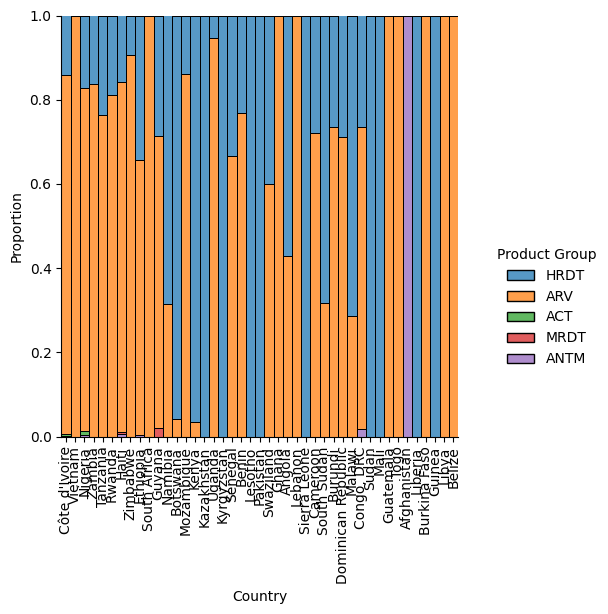

In [14]:
g = sns.displot(dataset, x="Country", hue="Product Group", multiple="fill", stat="proportion", kind="hist")
g.set_xticklabels(rotation=90)

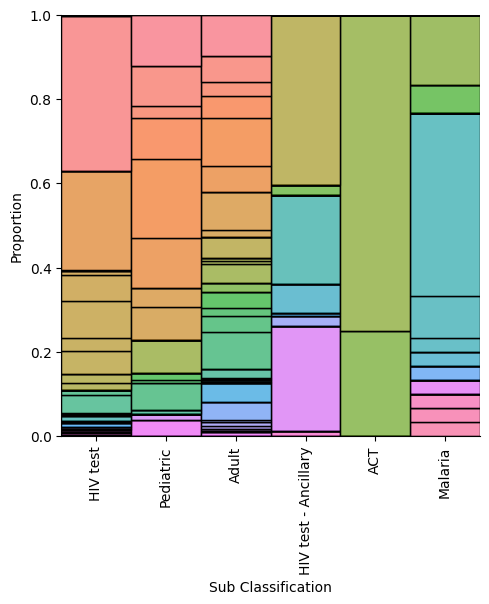

In [31]:
g = sns.displot(dataset, x="Sub Classification", hue="Molecule/Test Type", multiple="fill", stat="proportion", kind="hist", legend=False)
g.set_xticklabels(rotation=90)

## Freight Cost

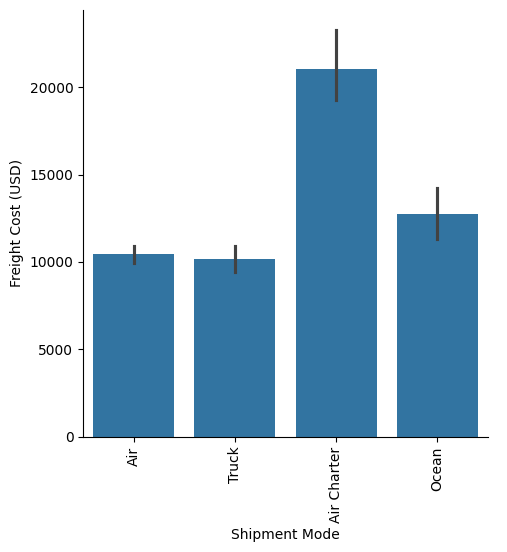

In [20]:
g = sns.catplot(dataset_unit_price, x="Shipment Mode", y="Freight Cost (USD)", kind="bar")
g.set_xticklabels(rotation=90)

<Axes: xlabel='Freight Cost (USD)', ylabel='Unit Price'>

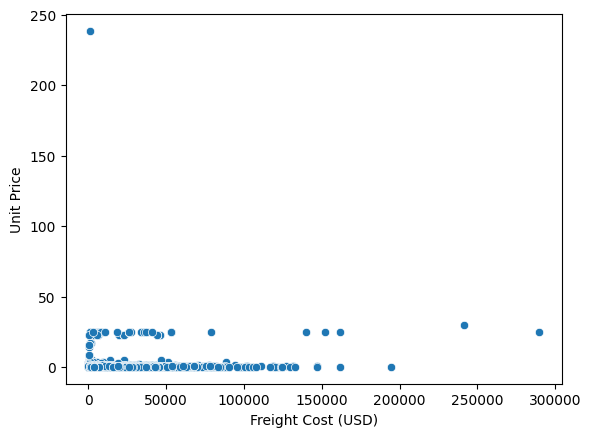

In [33]:
sns.scatterplot(data=dataset_unit_price, x="Freight Cost (USD)", y="Unit Price")

## Unit Price

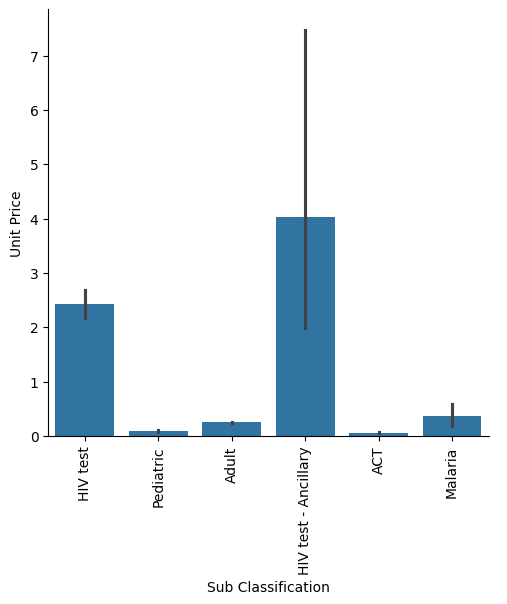

In [28]:
g = sns.catplot(dataset_unit_price, x="Sub Classification", y="Unit Price", kind="bar")
g.set_xticklabels(rotation=90)

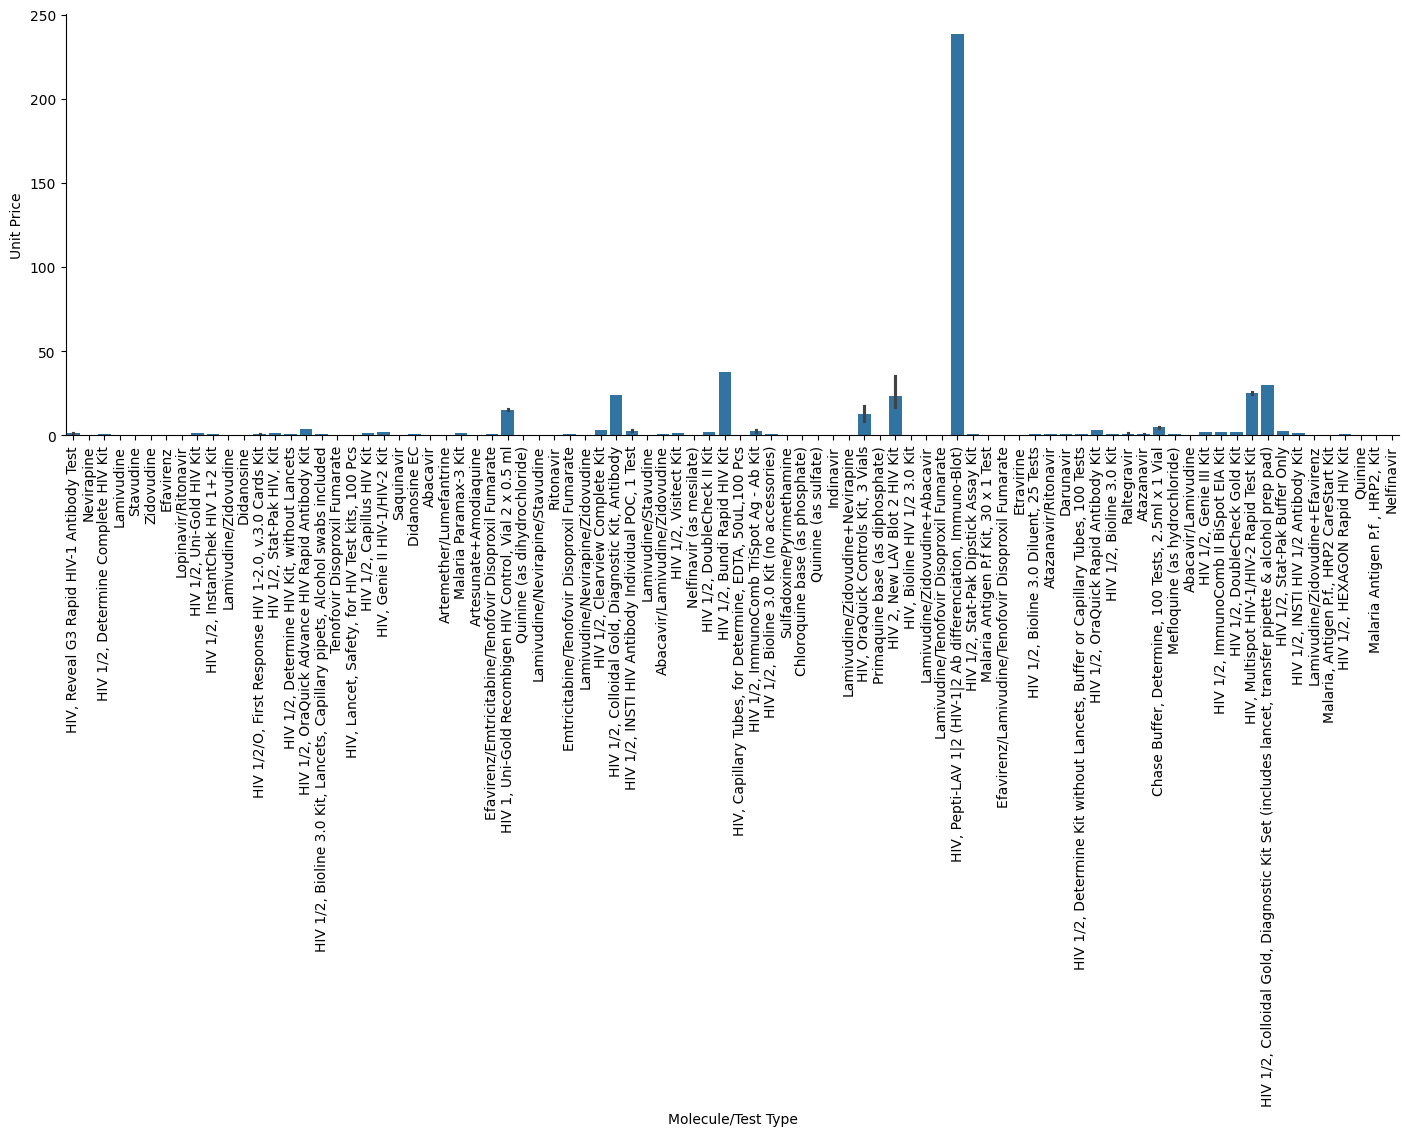

In [36]:
g = sns.catplot(dataset_unit_price, x="Molecule/Test Type", y="Unit Price", kind="bar", aspect=3)
g.set_xticklabels(rotation=90)